In [4]:
import numpy as np
from results import (
    report_baseline,
    report_letnet5,
    report_resnet,
    report_densenet,
    report_mobilenet,
    report_vit,
)

In [ ]:
# Custom 6330
# LeNet 61706
# ResNet 11402
# DenseNet 11666
# MobileNet 14218
# ViT 105546


In [34]:
from models import LeNet5, ResNetMini, DenseNetTiny, MobileNetLite, ViTTiny, BaselineCNN

lenet = LeNet5()
resnet = ResNetMini(base_channels=4)
densenet = DenseNetTiny()
mobilenet = MobileNetLite()
vit = ViTTiny()
baseline = BaselineCNN()

models = [
    lenet,
    resnet,
    densenet,
    mobilenet,
    vit,
    baseline,
]

import torch.nn as nn
# for model in models:
#     model:nn.Module
#     parameters = [p.numel() for p in model.parameters()]
#     param_sum = sum(parameters)
#     # print(parameters)
#     print(param_sum)



In [57]:
model_reports = {
    'baseline': report_baseline,
    'letnet5': report_letnet5,
    'resnet': report_resnet,
    'densenet': report_densenet,
    'mobilenet': report_mobilenet,
    'vit': report_vit,
}

for i, (name, report) in enumerate(model_reports.items()):
    metric = report['test_accuracy']
    epochs = np.arange(1, len(metric)+1)
    
    acc_argmax = np.argmax(metric)
    print(np.round(metric[acc_argmax], decimals=4), epochs[acc_argmax], name)


0.9004 13 baseline
0.8907 16 letnet5
0.911 29 resnet
0.8971 18 densenet
0.9155 41 mobilenet
0.8809 25 vit


In [ ]:
# Model Train   Time (Mean ± Std)   Infer. Time (Mean ± Std) Epochs   Total Train Time   Train Time/Param.    Parameters} \\
# LeNet-5 (lite)    & 20.29 ± 0.65  s & 1427 ± 77  ms & 21 & 426  s & 329 µs/K   & 62K \\
# ResNet (lite)     & 81.93 ± 2.77  s & 3981 ± 205 ms & 34 & 2786 s & 7186 µs/K  & 11K \\
# DenseNet (lite)   & 138.31 ± 3.33 s & 6958 ± 320 ms & 23 & 3181 s & 11856 µs/K & 12K \\
# MobileNet (lite)  & 164.19 ± 2.78 s & 9590 ± 428 ms & 43 & 7060 s & 11548 µs/K & 14K \\
# ViT (tiny)        & 136.28 ± 4.78 s & 7103 ± 439 ms & 27 & 3680 s & 1291 µs/K  & 106K \\
# Custom CNN        & 25.8 ± 1.3    s & 1755 ± 66  ms & 18 & 464  s & 4076 µs/K  & 6K \\

# Model} & Train Loss} & Test Loss} & Train Acc.} & Test Acc. (Epoch)} & Parameters} \\
# LeNet-5 (lite)    & 0.1931 & 0.3203 & 92.74\% & 89.07\% (E=16) & 62K  \\
# ResNet (lite)     & 0.2596 & 0.2488 & 90.62\% & 91.10\% (E=29) & 11K  \\
# DenseNet (lite)   & 0.3372 & 0.3009 & 88.01\% & 89.71\% (E=18) & 12K  \\
# MobileNet (lite)  & 0.2259 & 0.2464 & 91.91\% & 91.55\% (E=41) & 14K  \\
# ViT (tiny)        & 0.2265 & 0.3306 & 91.41\% & 88.09\% (E=25) & 106K \\
# Custom CNN        & 0.2616 & 0.2790 & 90.53\% & 90.04\% (E=13) & 6K   \\

# Discussion topics from the results:
# Lenet was considerably fast with respect to how many parameters the model uses.
# Majority (95%) of the model parameters come from the linear layers in the classifier 
# which probably can be heavily be optimized meaning the model will be efficient computationally
# despite the high potenial of state learning. This is also reflected through the loss and
# accuracy measures showing the model achieved considerably better metrics on the training
# dataset (best loss and acc out of all models) than the test dataset - this suggests the model
# generalizes bad and may perhaps be under-complex in the form of feature learning capacity. 
# The LeNet model was true to the orignial design apart from the input size of the images 
# and it is an old design (1998) which may have made this a compute intensive design at the 
# time. Improvements for this model would probably consist of increased feature learning
# capacity in the form of more convolutional layers or similar. 

# The ResNet model generalized well despite being the model with second to least trainable
# parameters achieving a lower loss and higher accuracy for the test dataset than the training
# dataset. The model achieved the second to best accuracy out of the models. ResNet also 
# held low training and inference times comparatively to DenseNet and MobileNet with similar
# number of parameters. Downsampling help keeping the number of computations down. 

# DISCUSSION
# Interesting article about how FashionMNIST accuracy increases with number of 
# trainable parameters (see graph). 
# \href{https://www.mdpi.com/2227-7390/12/20/3174#:~:text=The%20developed%20CNN%2D3%2D128,Fashion%2DMNIST%20test%20image%20set.}{CNN 99.65\% Accuracy}

# How lightweight affects performance and how the lightweight models have 
# performed in realtion to what is expected from them in theory.

# How ViT compared to the CNN architectures (not optimal for small datasets?)

# Effects of parameters on time? Same effect on training time and inference time? 

# Early stopping effects
# How increased patience could help, especially heavier models with more 
# parameters, to increase its learning streak as learning happens in a slower 
# pace and the risk of unlucky streaks of non decreasing loss could trigger 
# early stopping for low levels of patience when much learning potential is 
# still left (untapped). Interesting to see what loss each model reached, 
# which came the closes to zero and which stilly have much to give - potentially 
# better by higher patience and longer training rounds. 


In [65]:
(400*120 + 120*84 + 84*10) / 61706

0.9548504197322789

In [ ]:
noise = np.array([2, 5, -8, 13, 7, -6, 5, -5, -9])
theta = np.array([0.2, 0.07, 0.1, -0.13])



# ∇_4^2 Xt = Xt - Xt-4 = Xt - B^4 Xt = (1 - B^4)^2 Xt


# MA(4)
for i in range(4, len(noise)+1):
    print(f'Z{i-4}', noise[i-4:i])
    # print(theta @ noise[i-4:i])

Z0 [ 2  5 -8 13]
Z1 [ 5 -8 13  7]
Z2 [-8 13  7 -6]
Z3 [13  7 -6  5]
Z4 [ 7 -6  5 -5]
Z5 [-6  5 -5 -9]


3952.143796


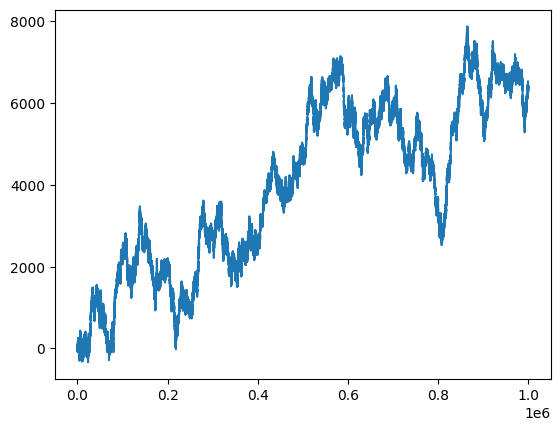

In [133]:
import matplotlib.pyplot as plt

N = 1000000
noise = np.random.randint(-10, 11, N)
noise
# X0 = 0
Xt = np.cumsum(noise)
print(np.mean(Xt))

plt.figure()
plt.plot(Xt)
plt.show()